In [1]:
!date
!pwd

Пнд Май 29 20:48:31 MSK 2017
/home/sphere/github/Sphere/separate


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

In [3]:
datum = pd.read_csv('01Events.dat', index_col=0)
print(datum.shape)
datum[:5]

(575, 25)


,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,delay,H,UTC,...,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
EID,,,,,,,,,,,,,,,,,,,,,
10675,E,10,688,242,241,242,241,360,307.8,2013-03-09 18:16:20,...,3.562,9.965,31.0,0.204204,0.766965,1.802776,34.0,32.0,2.497441,2.845292
10677,E,29,1336,241,240,243,240,112,307.8,2013-03-09 18:18:12,...,53.317,501.569,51.0,0.486947,1.157275,1.519109,56.0,13.0,5.654537,27.097272
10679,D,76,7143,242,250,252,242,13,307.6,2013-03-09 18:18:25,...,600.431,2820.565,9.0,1.193805,2.939874,1.058301,14.0,25.0,0.201590,1.311606
10683,E,22,505,236,243,472,236,181,305.9,2013-03-09 18:32:54,...,30.208,663.708,2.0,1.146681,1.483240,1.927248,5.0,7.0,0.928107,18.222066
10685,E,15,6588,242,242,242,242,1160,308.1,2013-03-09 18:52:14,...,33.247,1022.189,81.0,0.329867,0.681385,1.568929,84.0,39.0,4.959357,47.367534


In [4]:
print(datum.columns)

Index(['Type', 'Dt', 'Atotal', 'TG5time', 'TL2time', 'TL3time', 'TRIGGER',
       'delay', 'H', 'UTC', 'EAS', 'SNRatio_s', 'SNRatio_n', 'AbsSignal_s',
       'AbsSignal_n', 'TotalNoise_s', 'TotalNoise_n', 'NNear3', 'Theta',
       'dt2_s', 'dt2_n', 'ng_s', 'ng_n', 'Crit1', 'Crit2'],
      dtype='object')


In [5]:
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s',       
       'TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n', 'Crit1', 'Crit2',
       'Dt', 'Atotal','delay'] 
len(param)

17

### Кластеризация

Найдем с помощью метода локтя (см. 7 [статью](https://habrahabr.ru/company/ods/blog/325654/) курса) оптимальное число кластеров, которое стоит задать алгоритму kMeans в качестве гиперпараметра.

<font color='red'>Вопрос. </font> Каким будет оптимальное число кластеров для данных событий, если оценивать его с помощью метода локтя? Используйте в kMeans `random_state=1`, данные не масштабируйте.

В данном случае мы ищем наиболее выделеный излом в кривой расстояний до цетроидов в зависимости от числа кластеров. Будем рассматривать возможное число кластеров от 2 до 10. Как и в предыдущей задаче, нужно будет использовать `random_state=1` для инициализации алгоритма k-means.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

In [7]:
features = len(param)
exdata=datum[param]

##### Данные не масштабируемые

In [8]:
func = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(exdata)
    func.append(np.sqrt(kmeans.inertia_))

scores=[]
for i in range(1,18):
    scores.append((func[i]-func[i+1]) / (func[i-1]-func[i]))
    print("k={}: D(k)={}".format(i + 1 , round(scores[i-1], 3)))

k=2: D(k)=0.587
k=3: D(k)=0.486
k=4: D(k)=0.978
k=5: D(k)=1.101
k=6: D(k)=0.409
k=7: D(k)=0.794
k=8: D(k)=0.887
k=9: D(k)=0.745
k=10: D(k)=0.871
k=11: D(k)=0.807
k=12: D(k)=0.821
k=13: D(k)=0.959
k=14: D(k)=0.858
k=15: D(k)=0.847
k=16: D(k)=0.867
k=17: D(k)=1.071
k=18: D(k)=0.831


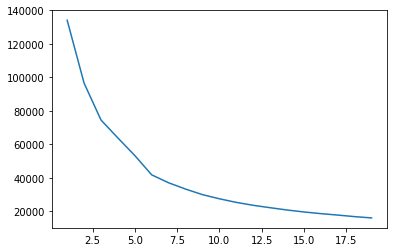

In [9]:
plt.plot(range(1, 20), func);

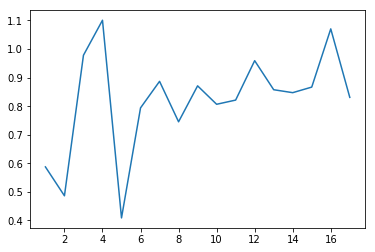

In [11]:
plt.plot(range(1, 18), scores);

<font color='red'>Ответ. </font> 6 кластеров.

##### Данные масштабируемые

Если данные масштабировать, то такого явного локтя не выявляется.

In [12]:
events_scaled = StandardScaler().fit_transform(exdata)

func = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(events_scaled)
    func.append(np.sqrt(kmeans.inertia_))

scores=[]
for i in range(1,18):
    scores.append((func[i]-func[i+1]) / (func[i-1]-func[i]))
    print("k={}: D(k)={}".format(i + 1 , round(scores[i-1], 3)))

k=2: D(k)=0.649
k=3: D(k)=0.996
k=4: D(k)=0.907
k=5: D(k)=0.788
k=6: D(k)=1.035
k=7: D(k)=0.836
k=8: D(k)=0.655
k=9: D(k)=1.008
k=10: D(k)=0.912
k=11: D(k)=0.708
k=12: D(k)=1.385
k=13: D(k)=0.852
k=14: D(k)=0.735
k=15: D(k)=0.804
k=16: D(k)=1.059
k=17: D(k)=0.577
k=18: D(k)=1.881


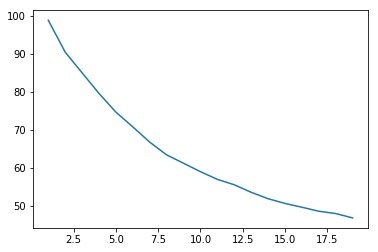

In [13]:
plt.plot(range(1, 20), func);

Сравним результаты кластеризации фотографий с помощью 4 алгоритмов – KMeans, агломеративной кластеризации, AffinityPropagation и спектральной кластеризации. Параметры алгоритмов возьмите как в примере в конце [статьи](https://habrahabr.ru/company/ods/blog/325654/), только измените число кластеров на 12.

In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn import metrics

In [26]:
clust = 2
target = datum.EAS

algorithms = [KMeans(n_clusters=clust, random_state=1),
              AffinityPropagation(),
              SpectralClustering(n_clusters=clust, random_state=1,
                                     affinity='nearest_neighbors'),
              AgglomerativeClustering(n_clusters=clust)]

res = []
for algo in algorithms:
    algo.fit(events_scaled)
    res.append(({
        'ARI':          metrics.adjusted_rand_score(target, algo.labels_),
        'AMI':          metrics.adjusted_mutual_info_score(target, algo.labels_),
        'Homogenity':   metrics.homogeneity_score(target, algo.labels_),
        'Completeness': metrics.completeness_score(target, algo.labels_),
        'V-measure':    metrics.v_measure_score(target, algo.labels_),
        'Silhouette':   metrics.silhouette_score(events_scaled, algo.labels_)}))

In [27]:
results = pd.DataFrame(data=res, 
                       columns =['ARI', 'AMI', 'Homogenity', 
                                 'Completeness', 'V-measure', 'Silhouette'],
                       index   =['KMeans', 'Affinity', 'Spectral', 'Agglomerative'])

In [28]:
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.257685,0.106797,0.108342,0.121919,0.114730,0.408622
Affinity,0.033895,0.105422,0.824268,0.119483,0.208711,0.175423
Spectral,0.490343,0.289213,0.290445,0.365449,0.323658,0.309313
Agglomerative,0.341495,0.167058,0.168507,0.258561,0.204039,0.447663


## AffinityPropagation

In [55]:
af = AffinityPropagation(preference=-100).fit(events_scaled)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity:  %0.3f" %  metrics.homogeneity_score(target, labels))
print("Completeness: %0.3f" %  metrics.completeness_score(target, labels))
print("V-measure:    %0.3f" %  metrics.v_measure_score(target, labels))
print("Adjusted Rand Index:         %0.3f"
      % metrics.adjusted_rand_score(target, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(target, labels))
print("Silhouette Coefficient:      %0.3f"
      % metrics.silhouette_score(events_scaled, labels, metric='sqeuclidean'))

Estimated number of clusters: 17
Homogeneity:  0.704
Completeness: 0.160
V-measure:    0.261
Adjusted Rand Index:         0.123
Adjusted Mutual Information: 0.155
Silhouette Coefficient:      0.313


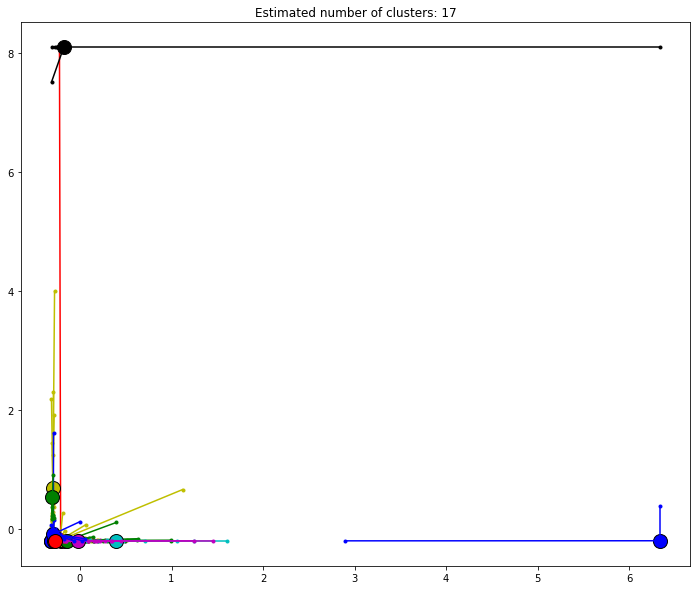

In [56]:
import matplotlib.pyplot as plt
from   itertools  import cycle

plt.close('all')
plt.figure(1)
plt.figure(figsize=(12,10))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = events_scaled[cluster_centers_indices[k]]
    plt.plot(events_scaled[class_members, 0], events_scaled[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in events_scaled[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [32]:
cluster_center[0]

-0.270016272134252

In [35]:
for k, col in zip(range(n_clusters_), colors):
    for x in events_scaled[class_members]:
        print(x,[cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

[ -0.27001627  -0.19532933  14.45390706   2.5984208    1.01234784
   5.12361306   4.48219235   3.58097689   1.05524623   1.03637127
   4.37794464   0.20899875   0.28716426  -0.06822339   4.62293929
  14.7287757   -0.74369314] [-0.270016272134252, -0.270016272134252] [-0.19532933292642007, -0.19532933292642007] y
[ -0.27001627  -0.19532933  14.45390706   2.5984208    1.01234784
   5.12361306   4.48219235   3.58097689   1.05524623   1.03637127
   4.37794464   0.20899875   0.28716426  -0.06822339   4.62293929
  14.7287757   -0.74369314] [-0.270016272134252, -0.270016272134252] [-0.19532933292642007, -0.19532933292642007] k
[ -0.27001627  -0.19532933  14.45390706   2.5984208    1.01234784
   5.12361306   4.48219235   3.58097689   1.05524623   1.03637127
   4.37794464   0.20899875   0.28716426  -0.06822339   4.62293929
  14.7287757   -0.74369314] [-0.270016272134252, -0.270016272134252] [-0.19532933292642007, -0.19532933292642007] b
[ -0.27001627  -0.19532933  14.45390706   2.5984208    1.0